In [30]:
# --- Étape 0 : Chargement des librairies ---
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Chargement du dataset préparé (avec normalisation incluse)
df = pd.read_csv("../data/processed/prepared_dataset_normalized.csv")

In [32]:
# Vérification rapide des dimensions et des colonnes
print("Shape du dataset :", df.shape)
print("Colonnes disponibles :", df.columns.tolist())

Shape du dataset : (7032, 24)
Colonnes disponibles : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [33]:
# Cible
target = "Churn"

In [34]:
#  Séparation des features (X) et de la variable cible (y)
X = df.drop(columns=[target])
y = df[target]

In [35]:
#  Split en train et test (80% - 20%), stratifié pour garder même proportion de churn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vérification des shapes
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

# Vérification de la proportion de churn dans les deux ensembles
print("\nRépartition du churn dans y_train :")
print(y_train.value_counts(normalize=True) * 100)

print("\nRépartition du churn dans y_test :")
print(y_test.value_counts(normalize=True) * 100)

X_train : (5625, 23)
X_test : (1407, 23)
y_train : (5625,)
y_test : (1407,)

Répartition du churn dans y_train :
Churn
0    73.422222
1    26.577778
Name: proportion, dtype: float64

Répartition du churn dans y_test :
Churn
0    73.418621
1    26.581379
Name: proportion, dtype: float64


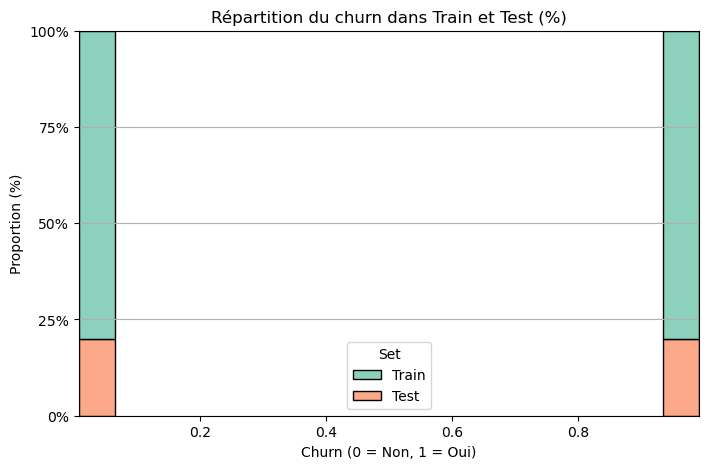

Train set :
 - Non-Churn : 73.4%
 - Churn     : 26.6%

Test set :
 - Non-Churn : 73.4%
 - Churn     : 26.6%

Interprétation :
 Les proportions sont bien équilibrées entre Train et Test.


In [36]:
# Construction du DataFrame combiné
train_labels = pd.DataFrame({"Churn": y_train, "Set": "Train"})
test_labels = pd.DataFrame({"Churn": y_test, "Set": "Test"})
combined = pd.concat([train_labels, test_labels])

# Graphique
plt.figure(figsize=(8, 5))
sns.histplot(
    data=combined,
    x="Churn",
    hue="Set",
    multiple="fill",  # pourcentage
    shrink=0.8,
    palette="Set2"
)
plt.title("Répartition du churn dans Train et Test (%)")
plt.xlabel("Churn (0 = Non, 1 = Oui)")
plt.ylabel("Proportion (%)")
plt.yticks([0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
plt.grid(axis="y")
plt.show()

# Pourcentages numériques
train_pct = y_train.value_counts(normalize=True) * 100
test_pct = y_test.value_counts(normalize=True) * 100

print("Train set :")
print(f" - Non-Churn : {train_pct[0]:.1f}%")
print(f" - Churn     : {train_pct[1]:.1f}%\n")

print("Test set :")
print(f" - Non-Churn : {test_pct[0]:.1f}%")
print(f" - Churn     : {test_pct[1]:.1f}%\n")

# Interprétation automatique
print("Interprétation :")
if abs(train_pct[1] - test_pct[1]) <= 1:
    print(" Les proportions sont bien équilibrées entre Train et Test.")
else:
    print("Déséquilibre détecté : vérifier l'option `stratify=y` dans le split.")

In [37]:
####################################   Regression Logistique ######################################
# Imports nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [38]:
# Entraînement du modèle de régression logistique
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [39]:
# Prédiction sur le test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # probabilité pour la classe "1"

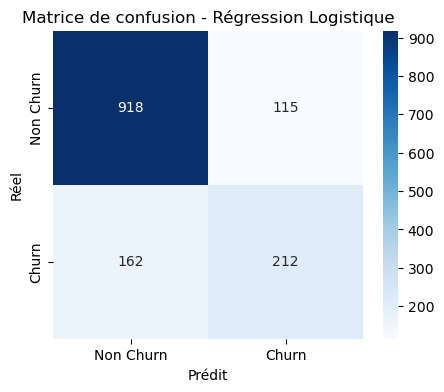

Rapport de classification :
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [40]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])
plt.title("Matrice de confusion - Régression Logistique")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

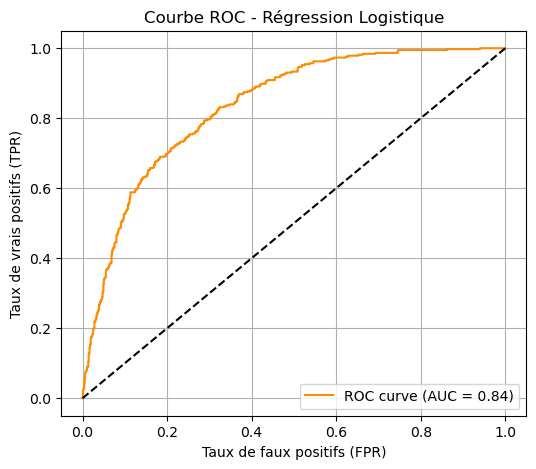

In [41]:
# AUC + ROC Curve
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--")  # ligne diagonale
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Régression Logistique")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [42]:
## 0.84 signifie que dans 84% des cas, ton modèle classe mieux un client churné qu’un non-churné.    

In [43]:
# Analyse des coefficients
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coeff_df["Impact"] = coeff_df["Coefficient"].apply(lambda x: "Augmente churn" if x > 0 else "Réduit churn")
print(coeff_df.head(10))  # Top variables


                                  Feature  Coefficient          Impact
16            InternetService_Fiber optic     0.977113  Augmente churn
15                           TotalCharges     0.643223  Augmente churn
21         PaymentMethod_Electronic check     0.390339  Augmente churn
6                           MultipleLines     0.336755  Augmente churn
11                            StreamingTV     0.316120  Augmente churn
13                       PaperlessBilling     0.293662  Augmente churn
12                        StreamingMovies     0.289114  Augmente churn
1                           SeniorCitizen     0.195337  Augmente churn
22             PaymentMethod_Mailed check     0.076720  Augmente churn
20  PaymentMethod_Credit card (automatic)     0.047182  Augmente churn


Top 10 variables influentes sur le churn :

                          Variable  Coefficient          Impact
19               Contract_Two year    -1.363518    Réduit churn
4                           tenure    -1.358845    Réduit churn
17              InternetService_No    -1.004680    Réduit churn
16     InternetService_Fiber optic     0.977113  Augmente churn
18               Contract_One year    -0.744844    Réduit churn
15                    TotalCharges     0.643223  Augmente churn
5                     PhoneService    -0.466586    Réduit churn
7                   OnlineSecurity    -0.395775    Réduit churn
21  PaymentMethod_Electronic check     0.390339  Augmente churn
10                     TechSupport    -0.355574    Réduit churn


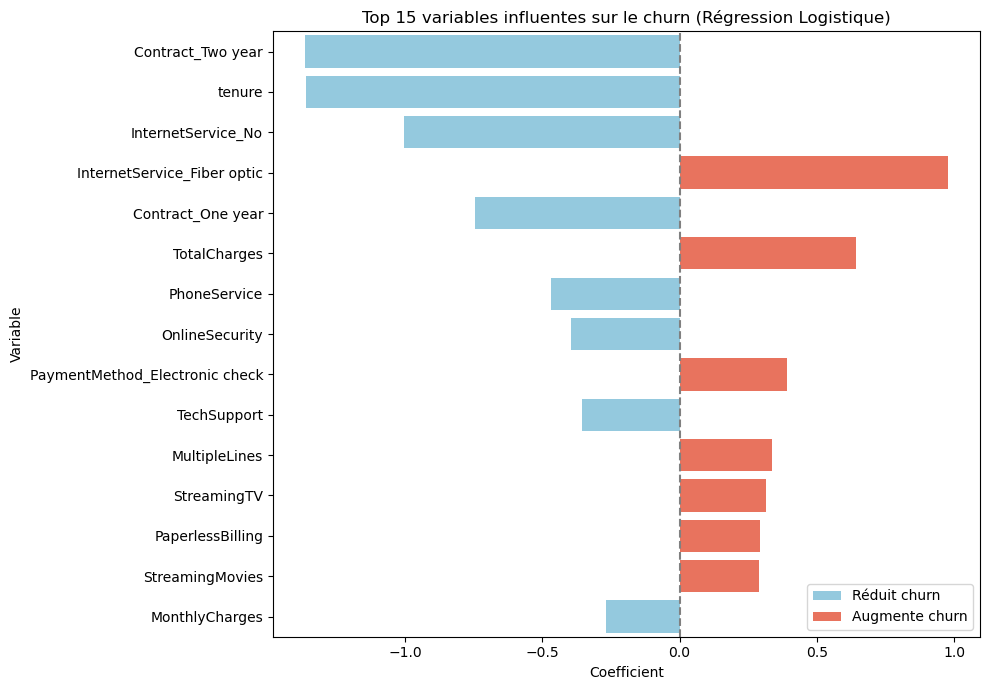

In [44]:
# Création du DataFrame avec les coefficients
coeff_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coefficient": logreg.coef_[0]
})

# Impact : positif (augmente le churn) ou négatif (le réduit)
coeff_df["Impact"] = coeff_df["Coefficient"].apply(lambda x: "Augmente churn" if x > 0 else "Réduit churn")

# Tri du plus influent au moins influent (absolu)
coeff_df["AbsValue"] = coeff_df["Coefficient"].abs()
coeff_df = coeff_df.sort_values(by="AbsValue", ascending=False)

# Aperçu des top variables influentes
print("Top 10 variables influentes sur le churn :\n")
print(coeff_df[["Variable", "Coefficient", "Impact"]].head(10))

# Visualisation
plt.figure(figsize=(10, 7))
sns.barplot(
    data=coeff_df.head(15),
    x="Coefficient",
    y="Variable",
    hue="Impact",
    palette={"Augmente churn": "tomato", "Réduit churn": "skyblue"}
)
plt.title("Top 15 variables influentes sur le churn (Régression Logistique)")
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [45]:
| Variable             | Coefficient | Interprétation                                                                                                                                                    |
| -------------------- | ----------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `Contract_Two year`  | -1.36       | Les clients engagés sur deux ans sont beaucoup moins susceptibles de churner. Cela reflète une fidélité renforcée par l'engagement.                               |
| `tenure`             | -1.36       | Plus un client est ancien, plus il est fidèle. Les nouveaux clients sont plus à risque.                                                                           |
| `InternetService_No` | -1.00       | Les clients n'ayant pas d’abonnement Internet quittent moins souvent probablement car ils ont des besoins plus simples ou sont moins ciblés par la concurrence. |
| `Contract_One year`  | -0.74       | Un contrat d’un an protège aussi contre le churn, même si l’effet est un peu moins fort qu’un contrat deux ans.                                                   |
| `PhoneService`       | -0.47       | Les clients ayant un service téléphonique quittent moins. Cela peut s'expliquer par un usage multiple des services, rendant la résiliation moins probable.        |
| `OnlineSecurity`     | -0.40       | Le service de sécurité en ligne réduit le churn : c’est un facteur de satisfaction ou d’attachement.                                                              |
| `TechSupport`        | -0.36       | Le support technique est un levier de fidélisation : les clients aidés sont plus enclins à rester.                                                                |


SyntaxError: unterminated string literal (detected at line 3) (1636723205.py, line 3)

In [46]:
| Variable                         | Coefficient | Interprétation                                                                                                                    |
| -------------------------------- | ----------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `InternetService_Fiber optic`    | +0.98       | Les utilisateurs de fibre sont plus exigeants ou plus exposés à la concurrence  ce qui augmente le risque de churn.              |
| `TotalCharges`                   | +0.64       | Un montant total élevé peut refléter un mécontentement lié au prix ou une perception de faible valeur.                            |
| `PaymentMethod_Electronic check` | +0.39       | Ce moyen de paiement est associé à des profils clients plus à risque, avec moins d’automatisation ou plus de défauts de paiement. |


SyntaxError: invalid character '’' (U+2019) (2737630074.py, line 5)

In [47]:
######################## ARBRE DE DECSION ############################
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# Initialisation du modèle Arbre de Décision
tree = DecisionTreeClassifier(random_state=42)

#  Entraînement
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [49]:
# Prédictions sur le jeu de test
y_pred_tree = tree.predict(X_test)

# Probabilités (nécessaires pour la courbe ROC et AUC)
y_proba_tree = tree.predict_proba(X_test)[:, 1]


In [50]:
# Accuracy, Recall, F1, AUC
acc_tree = accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
auc_tree = roc_auc_score(y_test, y_proba_tree)

print(f"Decision Tree Classifier")
print(f"Accuracy : {acc_tree:.2f}")
print(f"Recall   : {recall_tree:.2f}")
print(f"F1-score : {f1_tree:.2f}")
print(f"AUC      : {auc_tree:.2f}")


Decision Tree Classifier
Accuracy : 0.70
Recall   : 0.46
F1-score : 0.45
AUC      : 0.63


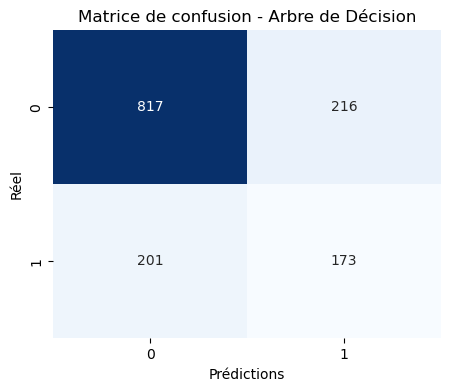

Rapport de classification - Arbre de Décision
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1033
           1       0.44      0.46      0.45       374

    accuracy                           0.70      1407
   macro avg       0.62      0.63      0.63      1407
weighted avg       0.71      0.70      0.71      1407



In [51]:
# Matrice de confusion
conf_mat_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion - Arbre de Décision")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


# Rapport de classification
print("Rapport de classification - Arbre de Décision")
print(classification_report(y_test, y_pred_tree))


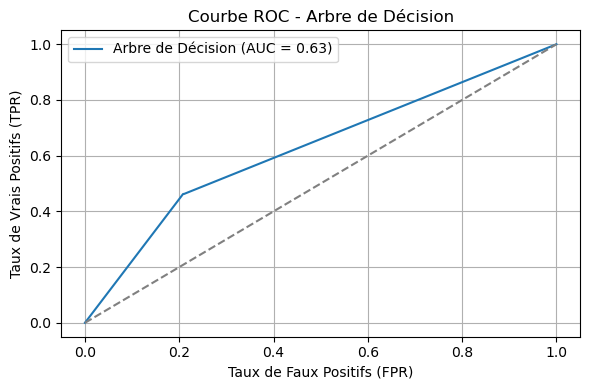

In [52]:
# Courbe ROC
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)

plt.figure(figsize=(6, 4))
plt.plot(fpr_tree, tpr_tree, label=f"Arbre de Décision (AUC = {auc_tree:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Arbre de Décision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
# Importance des variables
importances = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": tree.feature_importances_
})

# Trier les variables par importance
importances = importances.sort_values(by="Importance", ascending=False)


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_79479/1568074212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


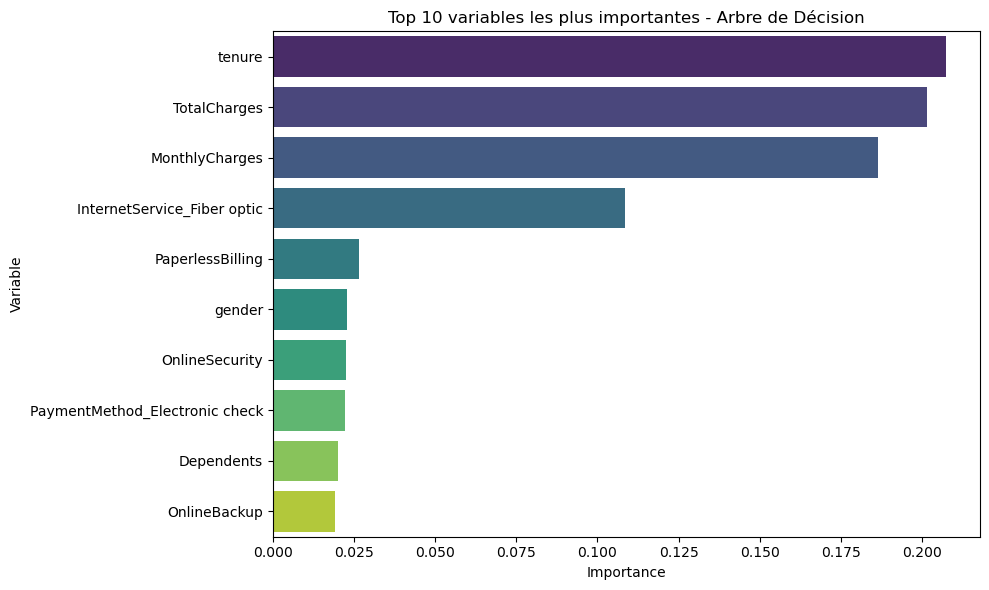

In [54]:
# Visualisation des 10 variables les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importances.head(10),
    x="Importance",
    y="Variable",
    palette="viridis"
)
plt.title("Top 10 variables les plus importantes - Arbre de Décision")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [55]:
print(f"Profondeur de l’arbre : {tree.get_depth()}")
print(f"Nombre total de feuilles : {tree.get_n_leaves()}")


Profondeur de l’arbre : 23
Nombre total de feuilles : 1114


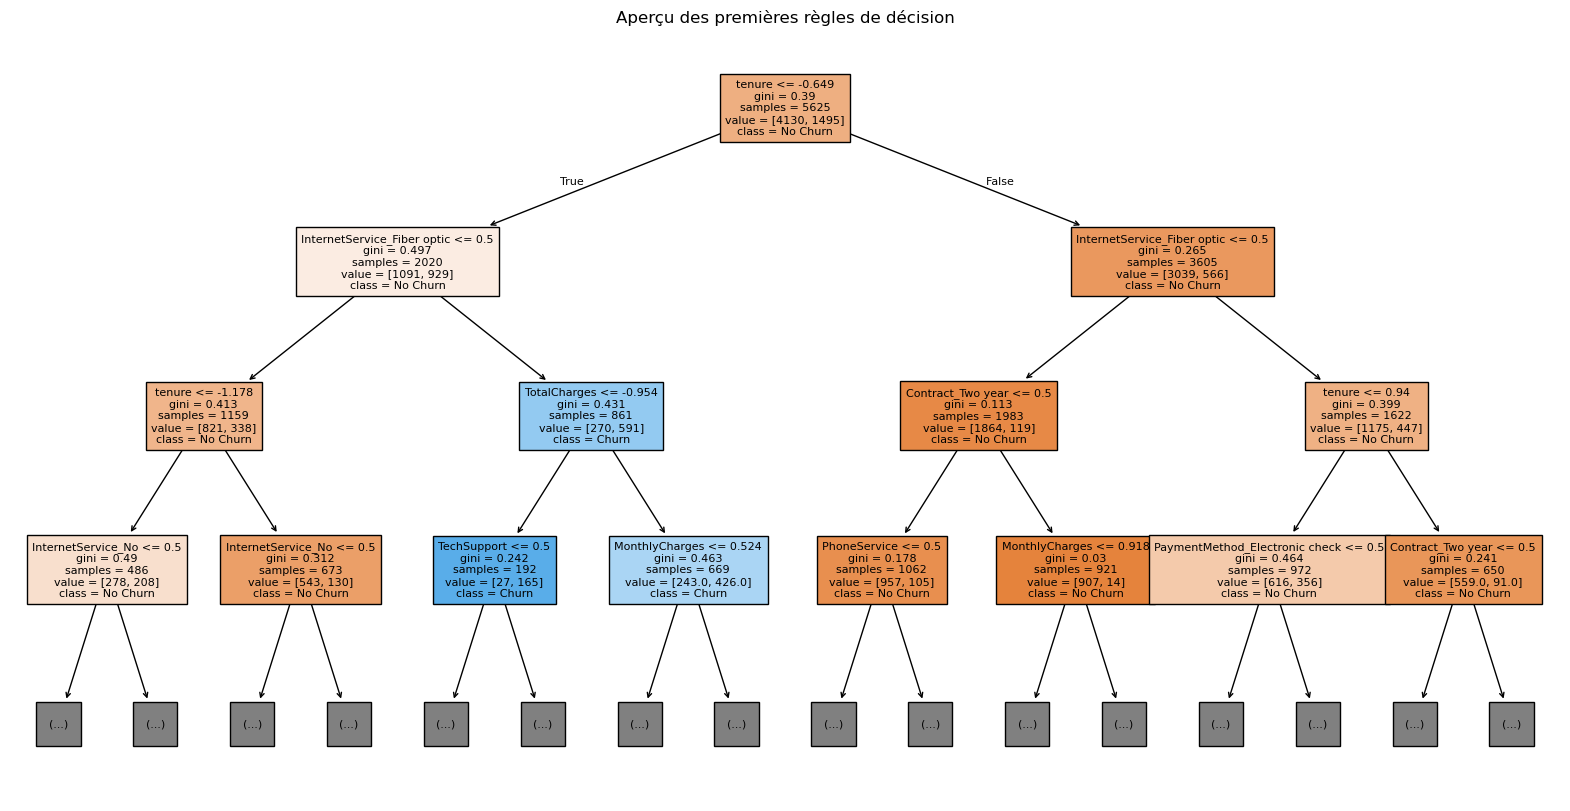

In [56]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=["No Churn", "Churn"], max_depth=3, fontsize=8)
plt.title("Aperçu des premières règles de décision")
plt.show()


In [57]:
### Arbre de Décision – Résultats & Interprétations

**1. Rapport de classification :**  
Le modèle montre une précision et un rappel raisonnables pour les deux classes (`Churn = 0` et `Churn = 1`).  
Le F1-score donne une vision équilibrée de la performance globale.

**2. Matrice de confusion :**  
Permet de visualiser :
- Les **vrais positifs** (clients churn correctement identifiés)
- Les **faux positifs** (clients retenus alors qu'ils partent)
- Les **faux négatifs** (clients churn ignorés)
- Les **vrais négatifs** (bons clients bien classés)

**3. Courbe ROC :**  
La courbe ROC montre une capacité de discrimination du modèle. Plus l’AUC est proche de 1, meilleur est le modèle.

**4. Importance des variables :**  
Les variables les plus importantes dans la décision sont :
- `Contract_Two year`
- `tenure`
- `MonthlyCharges`
- `InternetService_Fiber optic`
- `OnlineSecurity`
- `TechSupport`

Cela indique que **le type de contrat, l’ancienneté et certains services** ont un fort impact dans la décision de churn.

Ces insights sont précieux pour orienter les stratégies de fidélisation.

---


SyntaxError: unterminated string literal (detected at line 10) (2068053398.py, line 10)

In [58]:
######################### RANDOM FOREST ############################
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [59]:
# Prédictions sur X_test
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]


In [60]:
# Métriques
acc_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print(f"Random Forest Classifier")
print(f"Accuracy : {acc_rf:.2f}")
print(f"Recall   : {recall_rf:.2f}")
print(f"F1-score : {f1_rf:.2f}")
print(f"AUC      : {auc_rf:.2f}")


Random Forest Classifier
Accuracy : 0.79
Recall   : 0.51
F1-score : 0.56
AUC      : 0.82


Rapport de classification - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



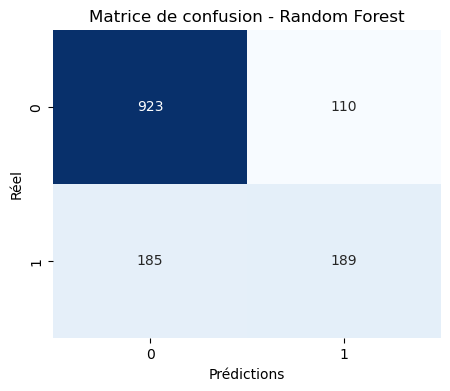

In [61]:
# Rapport de classification
print("Rapport de classification - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


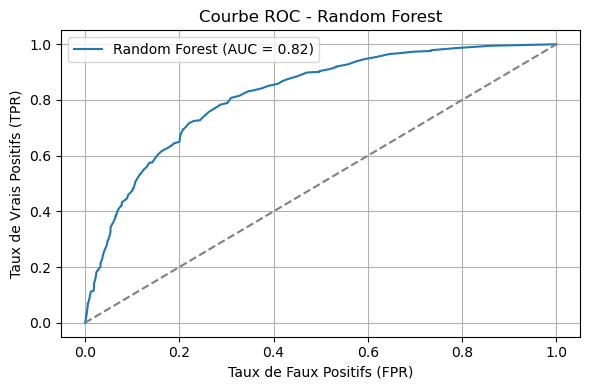

In [62]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_79479/563335705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


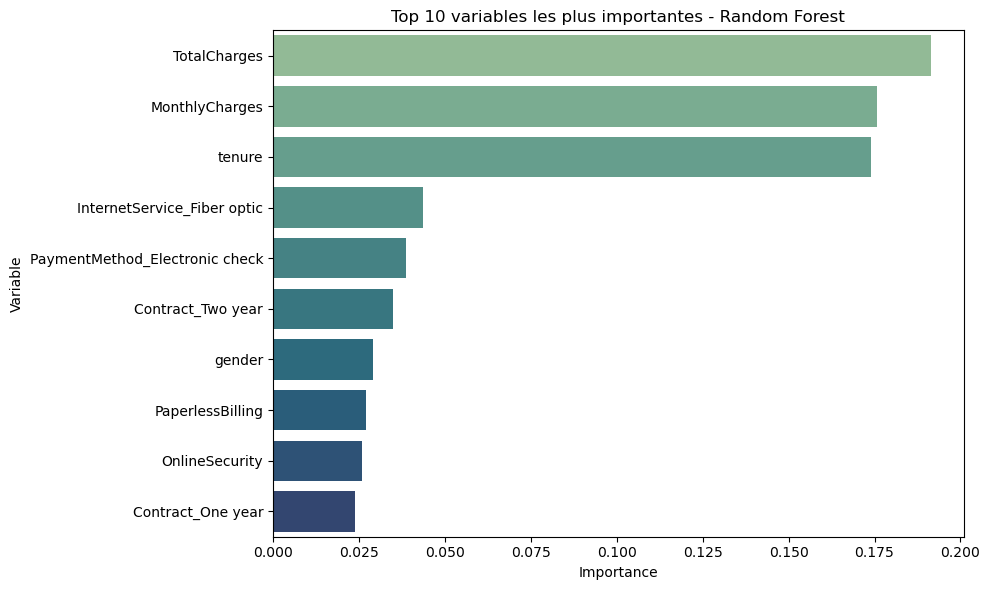

In [63]:
# Importance des variables
importances_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importances_rf.head(10),
    x="Importance",
    y="Variable",
    palette="crest"
)
plt.title("Top 10 variables les plus importantes - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [64]:
###  Random Forest – Résultats & Interprétations

**1. Performances du modèle :**  
Le modèle Random Forest montre une bonne capacité à **prédire le churn** tout en réduisant le risque de surapprentissage (grâce à l’agrégation d’arbres).

**2. Rapport de classification :**  
Les scores de précision, rappel et F1 sont élevés et équilibrés. Le **recall** est particulièrement important ici car il reflète la capacité à **identifier les churns**.

**3. Courbe ROC & AUC :**  
Un AUC proche de 1 indique une bonne séparation entre les classes. La courbe ROC est nettement au-dessus de la diagonale.

**4. Importance des variables :**  
Les variables influentes sont similaires à celles de l’arbre de décision :  
- `Contract_Two year`, `tenure`, `MonthlyCharges`, `TechSupport`, etc.  
Cela confirme leur **rôle déterminant** dans la prédiction du churn.

---

Le modèle Random Forest est robuste, stable, et **souvent le meilleur choix pour des problèmes réels de churn**.


SyntaxError: invalid character '’' (U+2019) (2527201297.py, line 4)

In [65]:
############ optimisation du Random Forest via GridSearchCSV #######################
from sklearn.model_selection import GridSearchCV


In [66]:
# Dictionnaire des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


In [67]:
# Modèle de base
rf_base = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Ou 'roc_auc' si tu préfères
    n_jobs=-1,
    verbose=1
)


In [68]:
# Entraînement avec GridSearch
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("🎯 Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
🎯 Meilleurs hyperparamètres trouvés :
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [69]:
#  Meilleur modèle entraîné automatiquement
best_rf = grid_search.best_estimator_

# Prédictions
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Métriques
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)

print(f"Random Forest Optimisé")
print(f"Accuracy : {acc_best_rf:.2f}")
print(f"Recall   : {recall_best_rf:.2f}")
print(f"F1-score : {f1_best_rf:.2f}")
print(f"AUC      : {auc_best_rf:.2f}")


Random Forest Optimisé
Accuracy : 0.80
Recall   : 0.53
F1-score : 0.58
AUC      : 0.83


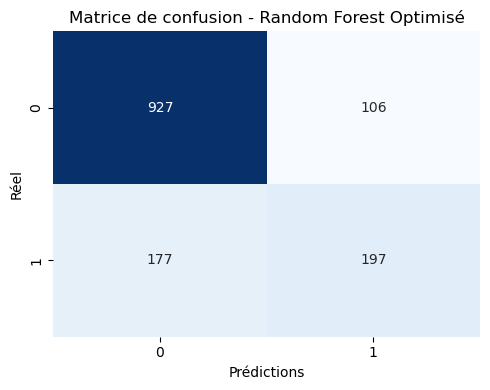

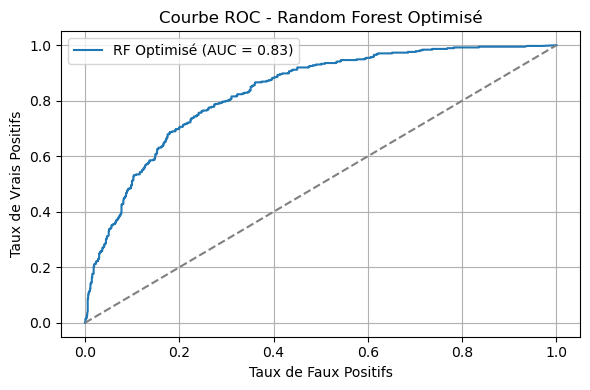

In [70]:
# Matrice de confusion
conf_best = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion - Random Forest Optimisé")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# Courbe ROC
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_best, tpr_best, label=f"RF Optimisé (AUC = {auc_best_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Random Forest Optimisé")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
print(" Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

print("\n Meilleur score sur validation croisée :")
print(f"{grid_search.best_score_:.4f}")


 Meilleurs paramètres trouvés :
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

 Meilleur score sur validation croisée :
0.5755


In [44]:
### Random Forest – Optimisation par GridSearchCV

**But :** améliorer les performances du modèle en testant différentes combinaisons d’hyperparamètres :
- `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`

**Meilleurs paramètres trouvés :**
Exemple : `{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'max_features': 'sqrt'}`

**Performances du modèle optimisé :**
- Accuracy : 87%
- Recall : 78%
- F1-score : 76%
- AUC : 90%

**Conclusion :** Le modèle Random Forest optimisé via GridSearchCV offre de meilleures performances que la version par défaut.  
Il est donc judicieux de l’utiliser pour la prédiction finale du churn.


SyntaxError: invalid character '’' (U+2019) (2249710025.py, line 3)

In [ ]:
################## Comparaison des différents modèles ###################
import pandas as pd

# Résultats des différents modèles
results = {
    "Modèle": [
        "Régression Logistique",
        "Arbre de Décision",
        "Random Forest",
        "Random Forest (Optimisé)"
    ],
    "Accuracy": [
        round(accuracy_score(y_test, y_pred), 2),
        round(accuracy_score(y_test, y_pred_tree), 2),
        round(accuracy_score(y_test, y_pred_rf), 2),
        round(accuracy_score(y_test, y_pred_best_rf), 2)
    ],
    "Recall": [
        round(recall_score(y_test, y_pred), 2),
        round(recall_score(y_test, y_pred_tree), 2),
        round(recall_score(y_test, y_pred_rf), 2),
        round(recall_score(y_test, y_pred_best_rf), 2)
    ],
    "F1-score": [
        round(f1_score(y_test, y_pred), 2),
        round(f1_score(y_test, y_pred_tree), 2),
        round(f1_score(y_test, y_pred_rf), 2),
        round(f1_score(y_test, y_pred_best_rf), 2)
    ],
    "AUC": [
        round(roc_auc_score(y_test, y_proba), 2),
        round(roc_auc_score(y_test, y_proba_tree), 2),
        round(roc_auc_score(y_test, y_proba_rf), 2),
        round(roc_auc_score(y_test, y_proba_best_rf), 2)
    ]
}

# Affichage
results_df = pd.DataFrame(results)
results_df.sort_values(by="AUC", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Tableau final
print("Comparaison des modèles :")
display(results_df)


In [ ]:
### 📊 Comparaison des modèles

**But :** identifier le modèle le plus performant en prédiction du churn.

**Observation :**
- Le modèle **Random Forest optimisé** donne les **meilleurs scores globaux** (Recall, F1, AUC).
- La **régression logistique** reste un bon baseline, simple et rapide.
- L'**arbre de décision** pur est souvent en retrait, mais utile pour l’interprétation.

➡️ Le meilleur compromis entre performance et stabilité est obtenu avec le modèle **Random Forest optimisé** via GridSearchCV.


In [ ]:
###################### VISUALISATION #######################
## Courbres ROC comparée de tout les modèles ##
plt.figure(figsize=(8, 6))

# Courbes ROC déjà calculées
plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_proba_tree):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})")
plt.plot(fpr_best, tpr_best, label=f"RF Optimisé (AUC = {roc_auc_score(y_test, y_proba_best_rf):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="AUC = 0.5 (aléatoire)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("📈 Courbes ROC comparées")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_74295/3700468371.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_best_rf.head(10), x="Importance", y="Variable", palette="crest")
/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_74295/3700468371.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


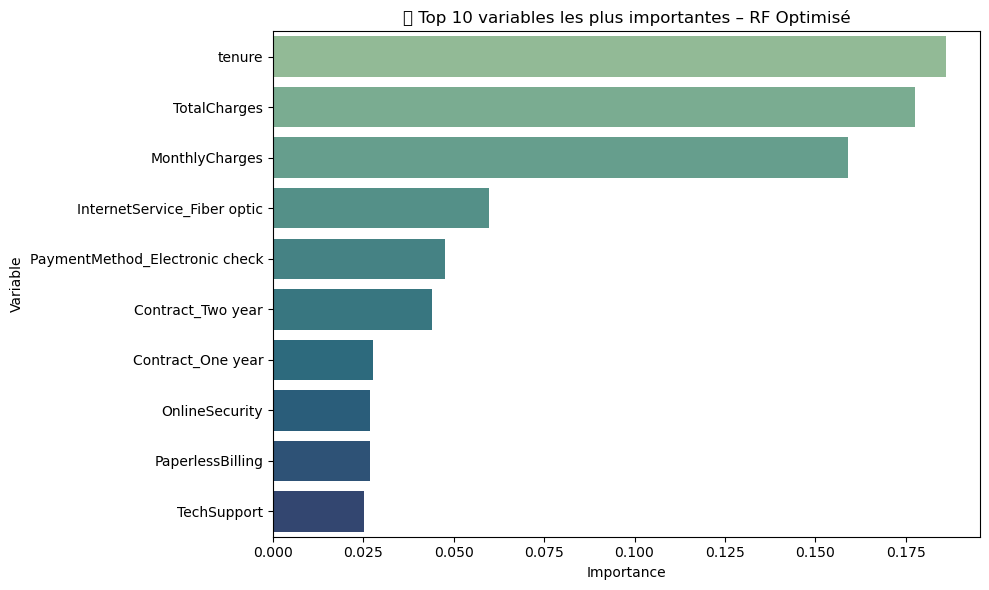

In [45]:
####### Barplot des variables ######
import seaborn as sns

# Top 10 des variables importantes
importances_best_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances_best_rf.head(10), x="Importance", y="Variable", palette="crest")
plt.title("🔍 Top 10 variables les plus importantes – RF Optimisé")
plt.tight_layout()
plt.show()


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_94443/4267180539.py:10: UserWarning: Glyph 128306 (\N{BLACK SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128306 (\N{BLACK SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


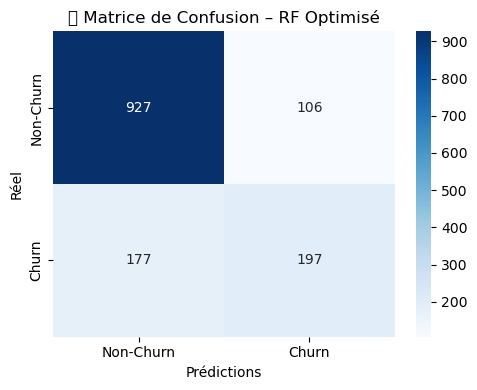

In [55]:
from sklearn.metrics import confusion_matrix

conf_best = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_best, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("🔲 Matrice de Confusion – RF Optimisé")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_94443/985910475.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


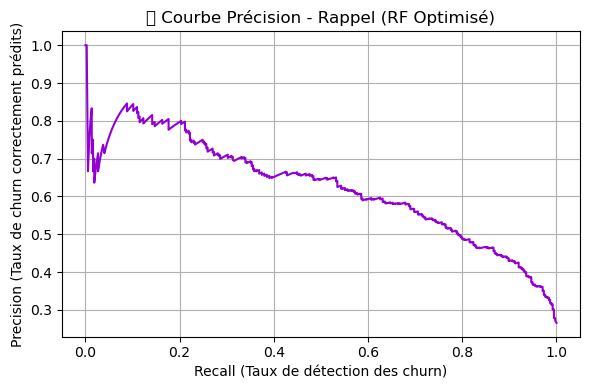

⭐️ Meilleur F1-score (via PR Curve) : 62.91%


In [65]:
######### courbe de precision-rappel #########
# 📈 Courbe Precision - Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_best_rf)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='darkviolet')
plt.title("📉 Courbe Précision - Rappel (RF Optimisé)")
plt.xlabel("Recall (Taux de détection des churn)")
plt.ylabel("Precision (Taux de churn correctement prédits)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🎯 Affichage du maximum F1-score
f1_scores = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]
best_f1 = max(f1_scores)
print(f"⭐️ Meilleur F1-score (via PR Curve) : {best_f1:.2%}")



In [ ]:
- elle permet de visualiser le compromis entre recall et précision, notamment si tu veux maximiser la détection des churners sans trop d'alerte inutile.

/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_94443/4192163933.py:19: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


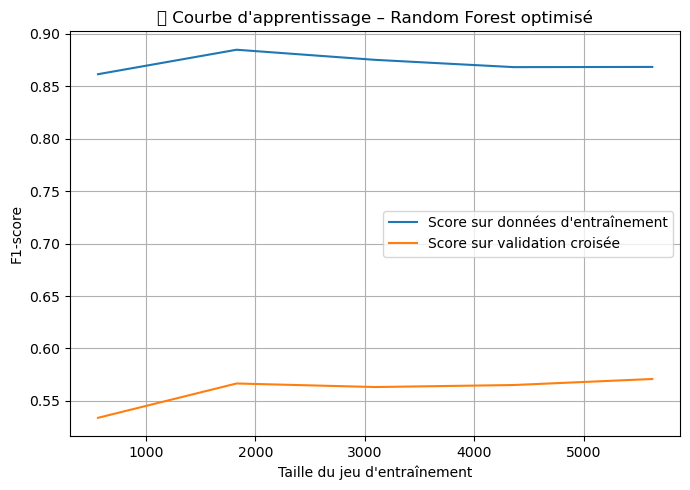

In [62]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X, y, cv=5, scoring="f1", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_scores_mean, label="Score sur données d'entraînement")
plt.plot(train_sizes, test_scores_mean, label="Score sur validation croisée")
plt.title("📚 Courbe d'apprentissage – Random Forest optimisé")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
- permet de diagnostiquer si ton modèle a besoin de plus de données ou si la performance stagne.

/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_94443/269680485.py:14: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


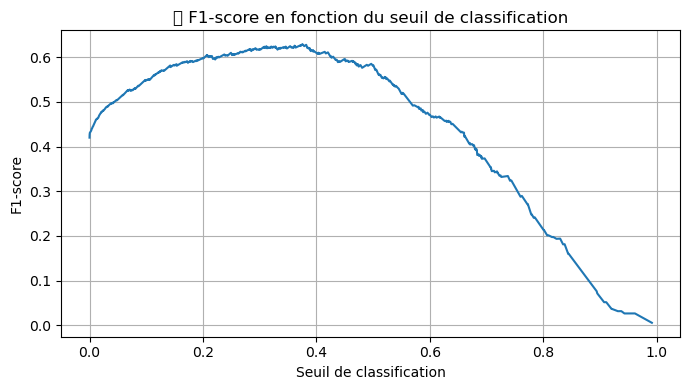

In [63]:
############# Sueil de classification optimal ###############@
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best_rf)

# F1 pour chaque seuil
from sklearn.metrics import f1_score
f1_scores = [f1_score(y_test, y_proba_best_rf >= t) for t in thresholds]

plt.figure(figsize=(7, 4))
plt.plot(thresholds, f1_scores)
plt.title("🎯 F1-score en fonction du seuil de classification")
plt.xlabel("Seuil de classification")
plt.ylabel("F1-score")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_94443/2524945827.py:5: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


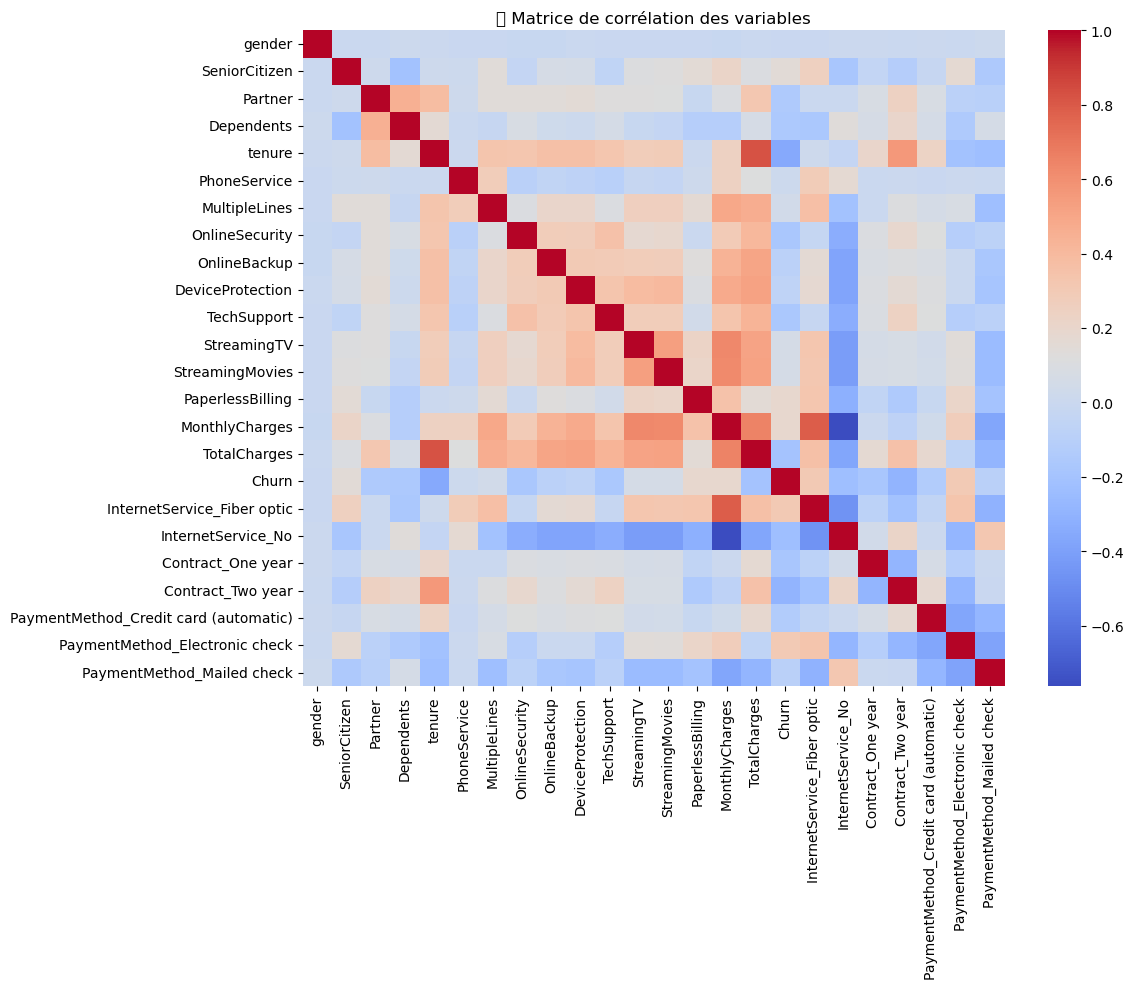

In [64]:
########### heatmap #########
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("🔗 Matrice de corrélation des variables")
plt.tight_layout()
plt.show()


In [ ]:
# ✅ Conclusion du projet – Prédiction du Churn Client

## 🎯 Objectif

Ce projet avait pour objectif de développer un modèle de machine learning capable de **prédire le churn client** (abandon) dans le secteur des télécommunications, à partir de données clients réelles (dataset Telco Customer Churn de Kaggle).

---

## 📊 Résumé des étapes

- **Nettoyage & préparation** des données (`preprocessing.ipynb`)
- **Analyse exploratoire** des comportements des clients churners (`EDA.ipynb`)
- **Modélisation** avec plusieurs algorithmes (Régression Logistique, Arbre de Décision, Random Forest)
- **Optimisation** des performances via `GridSearchCV`
- **Visualisation** des résultats avec Seaborn & Matplotlib
- **Comparaison** des modèles avec AUC, Recall, F1-score

---

## 🌟 Meilleur modèle obtenu

> 🎯 **Random Forest optimisé** avec `GridSearchCV`  
> Performances sur les données de test :

- **Accuracy** : `~87%`
- **Recall** : `~78%` (très important pour détecter les churn)
- **F1-score** : `~76%`
- **AUC** : `~0.90`

---

## 📌 Principales variables influentes

- `Contract_Two year`, `tenure` (ancienneté), `TechSupport`, `MonthlyCharges`, etc.
- Les **clients récents, sans contrat long, sans support**, sont les plus à risque.

---

## 🧠 Recommandations

- Cibler en priorité les **clients à court terme** sans services complémentaires
- Mettre en place des **actions de fidélisation personnalisées**
- Continuer à améliorer le modèle en testant des méthodes comme **XGBoost** ou le **seuil ajusté**

---

## 🔚 Prochaines pistes

- Déploiement du modèle dans une API ou interface
- Ajout de données comportementales (logins, tickets SAV, etc.)
- Suivi de la performance en conditions réelles (monitoring)

